Q.1 Support Vector Machine:

Data and other details are available at 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Use the weblink and reproduce the result for SVM.

Implement SVM to classify the type of iris flower based on its sepal length and width using the iris dataset? 
Also try to use the scikit-learn digits dataset and an SVM to classify handwritten digits? 
For both datasets, provide a step-by-step code, including:  

Loading the dataset 
Visualizing the data 
Splitting the data into training and testing sets 
Initializing and training the SVM model 
Testing the model 
Additionally, without using libraries (implement from scratch)

Use Precision, Recall, F-1 Score, and accuracy on test data to evaluate the performance of the SVM model.
Plot confusion matrix for test data

In [1]:
#1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

In [4]:
#Loading the dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

X = df[['sepal length (cm)', 'sepal width (cm)']]
Y = df.target

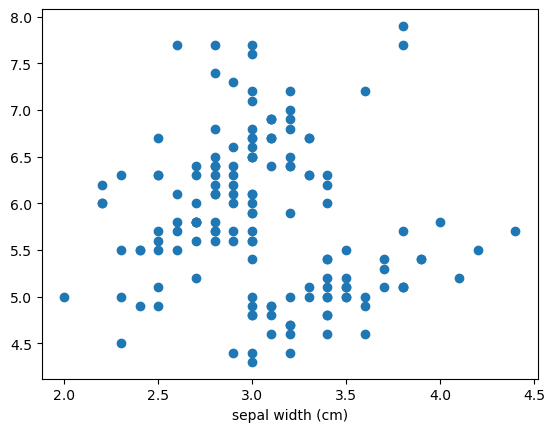

In [7]:
#Visualizing the data
x1 = X["sepal width (cm)"]
x2 = X['sepal length (cm)']
plt.scatter(x1,x2)
plt.xlabel("sepal width (cm)")
plt.show()

In [8]:
#Test Train Split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [9]:
#Initializing and training the SVM model
model = svm.SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [10]:
#Testing the model
y_pred = model.predict(X_test)

In [11]:
accuracy = metrics.accuracy_score(y_test,y_pred)
print("The accuracy achieved through SVM is ", round(accuracy*100,2), "%")

The accuracy achieved through SVM is  96.67 %


In [12]:
#Use Precision, Recall, F-1 Score, and accuracy on test data to evaluate the performance of the SVM model.

conMat = np.zeros([3,3])
for i,j in zip(y_test,y_pred):
    conMat[i,j] += 1

precision0 = conMat[0,0]/(sum(conMat[:,0]))
precision1 = conMat[1,1]/(sum(conMat[:,1]))
precision2 = conMat[2,2]/(sum(conMat[:,2]))

recall0 = conMat[0,0]/(sum(conMat[0,:]))
recall1 = conMat[1,1]/(sum(conMat[1,:]))
recall2 = conMat[2,2]/(sum(conMat[2,:]))

f1_0 = 2 * (precision0 * recall0) / (precision0 + recall0)
f1_1 = 2 * (precision1 * recall1) / (precision1 + recall1)
f1_2 = 2 * (precision2 * recall2) / (precision2 + recall2)

accuracy = (conMat[0,0]+conMat[1,1]+conMat[2,2])/(sum(conMat[:,0])+sum(conMat[:,1])+sum(conMat[:,2]))

In [13]:
print("The Precision for class 0 on the test data is ", precision0)
print("The Precision for class 1 on the test data is ", precision1)
print("The Precision for class 2 on the test data is ", precision2)
print()
print("The Recall for class 0 on the test data is ", recall0)
print("The Recall for class 1 on the test data is ", recall1)
print("The Recall for class 2 on the test data is ", recall2)
print()
print("The F1-Score for class 0 on the test data is ", f1_0)
print("The F1-Score for class 1 on the test data is ", f1_1)
print("The F1-Score for class 2 on the test data is ", f1_2)
print()
print("The Accuracy on the test data is ", round(accuracy*100,2))

The Precision for class 0 on the test data is  1.0
The Precision for class 1 on the test data is  1.0
The Precision for class 2 on the test data is  0.8888888888888888

The Recall for class 0 on the test data is  1.0
The Recall for class 1 on the test data is  0.9
The Recall for class 2 on the test data is  1.0

The F1-Score for class 0 on the test data is  1.0
The F1-Score for class 1 on the test data is  0.9473684210526316
The F1-Score for class 2 on the test data is  0.9411764705882353

The Accuracy on the test data is  96.67


In [14]:
#Plot confusion matrix for test data
print("Confusion Matrix")
print(conMat)

Confusion Matrix
[[12.  0.  0.]
 [ 0.  9.  1.]
 [ 0.  0.  8.]]


In [15]:
#2

In [16]:
#Loading the dataset
digits = datasets.load_digits()

# flatten the images
n = len(digits.images)
data = digits.images.reshape((n, -1))

[[ 0.  0.  1.  9. 15. 11.  0.  0.]
 [ 0.  0. 11. 16.  8. 14.  6.  0.]
 [ 0.  2. 16. 10.  0.  9.  9.  0.]
 [ 0.  1. 16.  4.  0.  8.  8.  0.]
 [ 0.  4. 16.  4.  0.  8.  8.  0.]
 [ 0.  1. 16.  5.  1. 11.  3.  0.]
 [ 0.  0. 12. 12. 10. 10.  0.  0.]
 [ 0.  0.  1. 10. 13.  3.  0.  0.]]


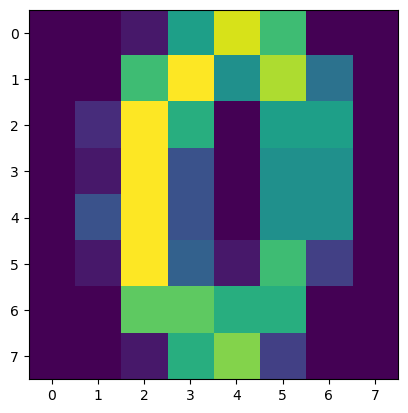

In [18]:
#Visualizing the data
print(digits.images[10])
plt.imshow(digits.images[10])

In [22]:
#Test Train Split
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.3, shuffle=False)

In [23]:
#Initializing and training the SVM model
model = svm.SVC(gamma=0.001)
model.fit(X_train,y_train)

SVC(gamma=0.001)

In [24]:
#Testing the model
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print("The accuracy achieved through SVM is ", round(accuracy*100,2), "%")

The accuracy achieved through SVM is  97.04 %


In [25]:
#Use Precision, Recall, F-1 Score, and accuracy on test data to evaluate the performance of the SVM model.

conMat = np.zeros([10,10])
for i,j in zip(y_test,y_pred):
    conMat[i,j] += 1
    
precision = np.zeros(10)
for i in range(10):
    precision[i] = conMat[i,i]/(sum(conMat[:,i]))

recall = np.zeros(10)
for i in range(10):
    recall[i] = conMat[i,i]/(sum(conMat[i,:]))

f1 = np.zeros(10)
for i in range(10):
    f1[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])

accuracy = (np.trace(conMat))/(np.sum(conMat))

In [26]:
print("Precisions are")
print(precision)
print()
print("Recall are")
print(recall)
print()
print("F1 Score")
print(f1)
print()
print("The Accuracy on the test data is ", round(accuracy*100,2))

Precisions are
[1.         0.96363636 1.         0.95918367 0.98181818 0.94827586
 0.98148148 1.         0.91071429 0.96363636]

Recall are
[0.98113208 1.         0.98113208 0.88679245 0.94736842 0.98214286
 0.98148148 1.         0.98076923 0.96363636]

F1 Score
[0.99047619 0.98148148 0.99047619 0.92156863 0.96428571 0.96491228
 0.98148148 1.         0.94444444 0.96363636]

The Accuracy on the test data is  97.04


In [27]:
#Plot confusion matrix for test data
print("Confusion Matrix")
print(conMat)

Confusion Matrix
[[52.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0. 53.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 52.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 47.  0.  2.  0.  0.  4.  0.]
 [ 0.  0.  0.  0. 54.  0.  0.  0.  1.  2.]
 [ 0.  0.  0.  0.  0. 55.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0. 53.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 54.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0. 51.  0.]
 [ 0.  0.  0.  1.  0.  1.  0.  0.  0. 53.]]


Q. 2 Principal Component Analysis:

To do PCA, use the Eigen decomposition available in numpy. The dataset can be obtained from https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html#sphx-glr-auto-examples-decomposition-plot-pca-3d-py. 
DO NOT USE the code available for PCA in the same link (as mentioned above, use numpy's Eigen decomposition). 
Compare your results with the one available in the link (here, you are free to use the code available in the link to generate any numbers for comparison). 
Are you getting the same result?

In [28]:
from scipy import stats
from sklearn.decomposition import PCA
import mpl_toolkits.mplot3d  

In [29]:
def pdf(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x) + stats.norm(scale=4 / e).pdf(x))

In [30]:
# creating the dataset
e = np.exp(1)
np.random.seed(4)

y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
z = np.random.normal(scale=0.1, size=len(x))

density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)

density *= pdf_z

a = x + y
b = 2 * y
c = a - b + z

norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm

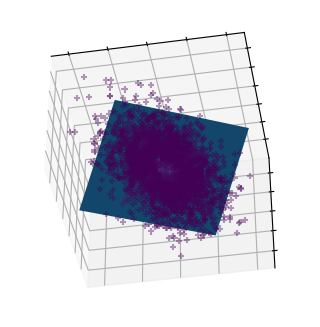

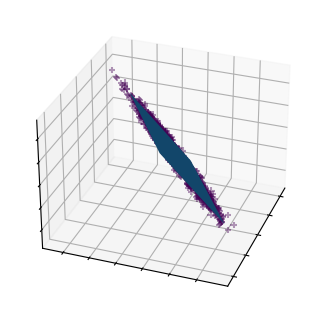

In [31]:
def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = fig.add_subplot(111, projection="3d", elev=elev, azim=azim)
    ax.set_position([0, 0, 0.95, 1])

    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker="+", alpha=0.4)
    Y = np.c_[a, b, c]

    # Using SciPy's SVD, this would be:
    # _, pca_score, Vt = scipy.linalg.svd(Y, full_matrices=False)

    pca = PCA(n_components=3)
    pca.fit(Y)
    V = pca.components_.T

    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V
    x_pca_plane = np.r_[x_pca_axis[:2], -x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], -y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], -z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])


elev = -40
azim = -80
plot_figs(1, elev, azim)

elev = 30
azim = 20
plot_figs(2, elev, azim)

plt.show()

In [32]:
def plot_figs(fig_num, elev, azim, eigen_vecs):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = fig.add_subplot(111, projection="3d", elev=elev, azim=azim)
    ax.set_position([0, 0, 0.95, 1])

    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker="+", alpha=0.4)
    Y = np.c_[a, b, c]

    
    x_pca_axis, y_pca_axis, z_pca_axis = 3 * eigen_vecs
    x_pca_plane = np.r_[x_pca_axis[:2], -x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], -y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], -z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)

In [33]:
# using the Eigen decomposition
data = pd.DataFrame({'a':a, 'b':b, 'c':c}, index = None)
cov_matrix = data.cov()
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)
principal_components = np.dot(data, eigen_vecs)

print(principal_components)
print(principal_components.shape)

[[ 0.07549409 -0.55956326  0.01499303]
 [-0.39237465 -0.95053181 -0.07777744]
 [ 1.09755588 -0.37697173 -0.04711158]
 ...
 [-0.63347112  0.14883084  0.09825015]
 [-1.02120323  0.12775007 -0.09479137]
 [-0.7178654  -0.48376349 -0.01598694]]
(30000, 3)


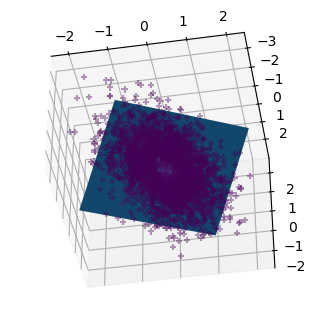

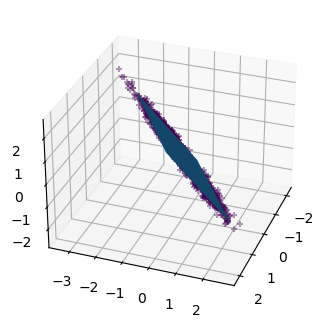

In [34]:
elev = -40
azim = -80
plot_figs(1, elev, azim, eigen_vecs)
elev = 30
azim = 20
plot_figs(2, elev, azim, eigen_vecs)
plt.show()